<a href="https://colab.research.google.com/github/AmandaMartins12/Data_Analyst_Portfolio/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analyzing a patient's risk of developing cardiovascular problems using the clustering technique**

##**Importing Libraries**

In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import plotly.express as px
 import plotly.offline as py
 import plotly.graph_objects as go

##**Checking Library Versions**

In [ ]:
import sklearn
import plotly

print(f'''Checking Library Versions:\n
pandas: {pd.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Checking Library Versions:

pandas: 1.5.3
sklearn: 1.2.2
plotly: 5.13.1



##**Data Collection**

##**Data collection from Brazilian states**

In [ ]:
#Collecting data from states
states = pd.read_csv('/content/sample_data/unidades_federativas_do_Brasil.csv', sep=';', encoding='latin-1')
states.head()

,codigo_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


##**Collecting customer profile data**

In [ ]:
#Customer Data Collection
customer_profile = pd.read_excel('/content/dados_perfil.xlsx')
customer_profile.head()

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
0,1,M,74.0,Moderado,Atividade Moderada,31
1,2,F,34.0,Baixo,Atividade Moderada,35
2,3,M,18.0,Moderado,Atividade Moderada,29
3,4,M,72.0,Baixo,Sedentário,15
4,5,F,63.0,Baixo,Atividade Moderada,41


##**Collecting medical data from clients**

In [ ]:
#Medical Data Collection
medical_data = pd.read_csv('/content/dados_medicos.csv', sep=';', encoding='latin-1')
medical_data.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


##**Analyzing Collected Data**

##**States**

In [ ]:
#Summarizing the dataframe
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_uf  27 non-null     int64  
 1   uf         27 non-null     object 
 2   nome       27 non-null     object 
 3   latitude   27 non-null     float64
 4   longitude  27 non-null     float64
 5   regiao     27 non-null     object 
 6   pais       27 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
#Generating some statistics from the dataframe
states.describe()

,codigo_uf,latitude,longitude
count,27.000000,27.000000,27.000000
mean,29.111111,-12.381111,-48.410370
std,13.024631,8.476122,9.291479
min,11.000000,-30.170000,-70.550000
25%,19.000000,-18.645000,-52.990000
50%,27.000000,-10.570000,-48.260000
75%,38.000000,-6.205000,-41.025000
max,53.000000,1.990000,-36.590000


##**Customer Profile**

In [ ]:
#Summarizing the dataframe
customer_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Gênero             1000 non-null   object 
 2   Idade              990 non-null    float64
 3   Consumo de Álcool  1000 non-null   object 
 4   Atividade Física   1000 non-null   object 
 5   cod_uf             1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
#Generating some statistics from the dataframe
customer_profile.describe()

,ID,Idade,cod_uf
count,1000.000000,990.000000,1000.000000
mean,500.500000,48.887879,29.289000
std,288.819436,17.940937,13.041993
min,1.000000,18.000000,11.000000
25%,250.750000,33.000000,17.000000
50%,500.500000,49.000000,27.000000
75%,750.250000,64.000000,41.000000
max,1000.000000,80.000000,53.000000


##**Medical Data**

In [ ]:
#Summarizing the dataframe
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   IMC                            1000 non-null   float64
 2   Pressão Sistólica              1000 non-null   int64  
 3   Pressão Diastólica             1000 non-null   int64  
 4   Nível de Açúcar                1000 non-null   object 
 5   peso                           1000 non-null   float64
 6   Colesterol Total               989 non-null    float64
 7   Triglicerídeos                 1000 non-null   float64
 8   Histórico Familiar - Cardiaco  1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [ ]:
#Generating some statistics from the dataframe
medical_data.describe()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,peso,Colesterol Total,Triglicerídeos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,989.000000,1000.000000
mean,500.500000,28.909900,130.038000,80.299000,150.796100,193.219717,147.386100
std,288.819436,6.431569,23.175151,11.966737,26.447694,32.007185,36.455399
min,1.000000,18.000000,90.000000,60.000000,67.500000,96.400000,49.200000
25%,250.750000,23.300000,111.000000,70.000000,133.975000,173.000000,122.675000
50%,500.500000,28.500000,129.000000,81.000000,150.750000,194.300000,147.500000
75%,750.250000,34.900000,150.000000,90.000000,169.425000,214.300000,170.350000
max,1000.000000,40.000000,170.000000,100.000000,234.400000,293.200000,259.300000


##**Analyzing Missing Data**


In [ ]:
#Analyzing data from the states
states.isna().sum()

codigo_uf    0
uf           0
nome         0
latitude     0
longitude    0
regiao       0
pais         0
dtype: int64

In [ ]:
#Analyzing customer profile data
customer_profile.isna().sum()

ID                    0
Gênero                0
Idade                10
Consumo de Álcool     0
Atividade Física      0
cod_uf                0
dtype: int64

In [ ]:
#Analyzing customer medical data
medical_data.isna().sum()

ID                                0
IMC                               0
Pressão Sistólica                 0
Pressão Diastólica                0
Nível de Açúcar                   0
peso                              0
Colesterol Total                 11
Triglicerídeos                    0
Histórico Familiar - Cardiaco     0
dtype: int64

##**Viewing Missing Data**

In [ ]:
#Checking the "customer_profile" null-value records
customer_profile.loc[customer_profile['Idade'].isnull()]

,ID,Gênero,Idade,Consumo de Álcool,Atividade Física,cod_uf
92,93,F,NaN,Baixo,Atividade Moderada,33
162,163,M,NaN,Baixo,Sedentário,41
163,164,F,NaN,Baixo,Ativo,28
164,165,F,NaN,Baixo,Atividade Moderada,41
205,206,M,NaN,Baixo,Ativo,12
833,834,M,NaN,Moderado,Ativo,53
841,842,F,NaN,Alto,Atividade Moderada,43
894,895,F,NaN,Moderado,Atividade Moderada,43
971,972,M,NaN,Alto,Atividade Moderada,53
995,996,F,NaN,Moderado,Sedentário,23


In [ ]:
#Checking the "medical_data" null-value records
medical_data.loc[medical_data['Colesterol Total'].isnull()]

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,Colesterol Total,Triglicerídeos,Histórico Familiar - Cardiaco
42,43,26.7,165,66,Normal,177.2,NaN,141.9,Não
48,49,24.4,141,68,Normal,113.8,NaN,175.8,Sim
218,219,33.5,142,69,Normal,150.9,NaN,168.3,Não
401,402,31.0,142,90,Alto,104.4,NaN,120.0,Não
565,566,20.6,155,87,Normal,129.9,NaN,155.6,Sim
629,630,28.7,92,86,Normal,143.6,NaN,110.7,Não
710,711,33.6,92,100,Alto,171.9,NaN,119.1,Não
720,721,27.4,112,88,Normal,143.0,NaN,148.1,Não
737,738,33.2,140,61,Normal,133.8,NaN,86.0,Não
839,840,36.1,116,83,Normal,134.2,NaN,160.4,Não


##**Treatment of the collected data**

##**Correcting missing data (deleting the data)**

In [ ]:
#Deleting Customer Profile Data
customers = customer_profile.dropna(subset=['idade'], inplace=False)

##**Correcting missing data (using the mean)**

In [ ]:
#Renaming the Total Cholesterol column
medical_data.rename(columns={'Colesterol Total': 'colesterol'}, inplace = True)
medical_data.head()

,ID,IMC,Pressão Sistólica,Pressão Diastólica,Nível de Açúcar,peso,colesterol,Triglicerídeos,Histórico Familiar - Cardiaco
0,1,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,37.2,99,63,Normal,161.5,218.3,146.0,Não


In [ ]:
#Calculating Average Cholesterol
mean = medical_data.colesterol.mean()
print(f'O valor da média é {media}')

O valor da média é 193.21971688574317


In [ ]:
#Rounding the mean
round(media, 2)

193.22

In [ ]:
medical_data.columns = medical_data.columns.str.lower()

In [ ]:
customers.columns = customer_profile.columns.str.lower()

In [ ]:
#Fill in missing values by the average
medical_data.colesterol.fillna(round(media, 2), inplace=True)

In [ ]:
#Check if there are any missing values
medical_data.isna().sum()

id                               0
imc                              0
pressão sistólica                0
pressão diastólica               0
nível de açúcar                  0
peso                             0
colesterol                       0
triglicerídeos                   0
histórico familiar - cardiaco    0
dtype: int64

##**Data manipulation and visualization**

<Axes: title={'center': 'Idade dos Pacientes'}, xlabel='idade', ylabel='Count'>

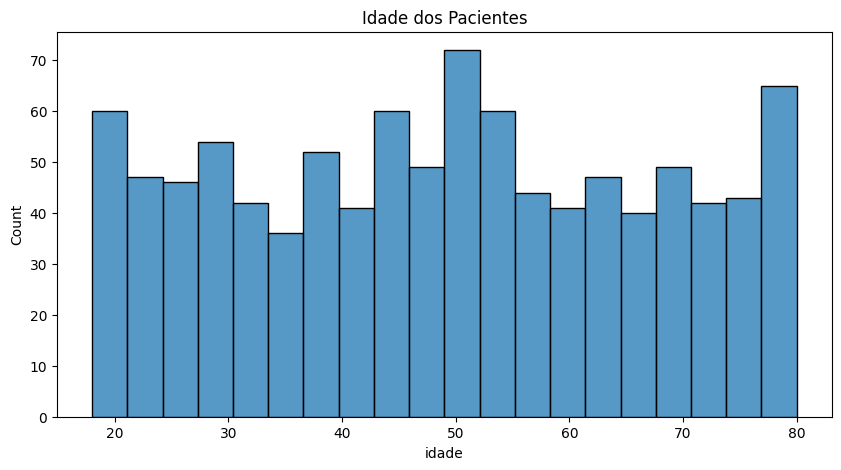

In [ ]:
#Creating histograms based on patient weight
plt.figure(figsize=(10,5))
plt.title("Idade dos Pacientes")
sns.histplot(general_data.idade, bins=20)

<ipython-input-128-738b4c7b6b3a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

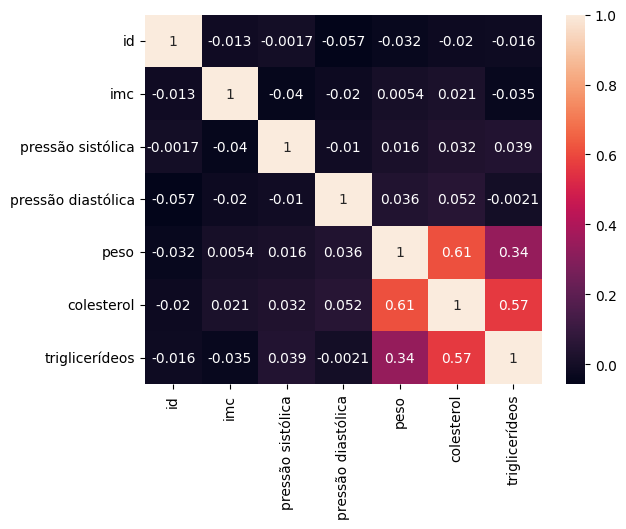

In [ ]:
correlacao1 = general_data.corr()
sns.heatmap(correlacao1, annot=True)

<Axes: title={'center': 'Triglicerídios dos Pacientes'}, xlabel='triglicerídeos', ylabel='Count'>

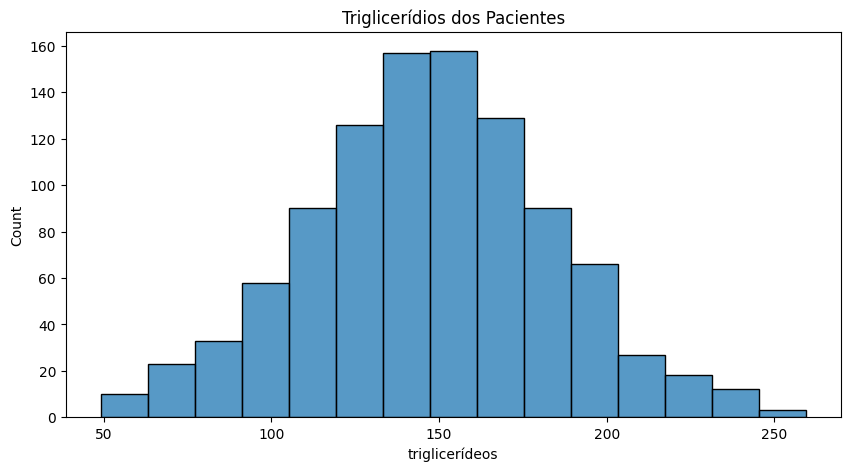

In [ ]:
#Creating histograms based on patients' triglycerides
plt.figure(figsize=(10,5))
plt.title("Triglicerídios dos Pacientes")
sns.histplot(medical_data.triglicerídeos, bins=15)

<Axes: title={'center': 'Correlação entre o peso e o triglicerídeos'}>

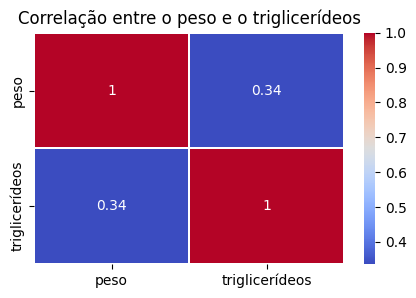

In [ ]:
#Getting the correlation between weight and triglycerides
plt.figure(figsize=(5,3))
plt.title('Correlação entre o peso e o triglicerídeos')
data_correlacao = medical_data[['peso','triglicerídeos']]
sns.heatmap(data_correlacao.corr(),cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True)

##**Merging customer profile datasets with medical data**

In [ ]:
customers_data = pd.merge(clientes, dados_medicos, on='id')
customers_data.sort_values('id')

,id,gênero,idade,consumo de álcool,atividade física,cod_uf,imc,pressão sistólica,pressão diastólica,nível de açúcar,peso,colesterol,triglicerídeos,histórico familiar - cardiaco
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,162.1,262.8,152.6,Sim
1,2,F,34.0,Baixo,Atividade Moderada,35,28.1,93,66,Normal,193.4,199.2,152.4,Sim
2,3,M,18.0,Moderado,Atividade Moderada,29,26.1,109,86,Normal,162.2,223.4,190.1,Não
3,4,M,72.0,Baixo,Sedentário,15,31.6,159,87,Normal,155.4,189.7,130.2,Não
4,5,F,63.0,Baixo,Atividade Moderada,41,37.2,99,63,Normal,161.5,218.3,146.0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,995,F,18.0,Alto,Sedentário,31,32.7,148,87,Normal,154.2,203.7,152.9,Não
986,997,M,24.0,Baixo,Ativo,23,21.8,137,73,Normal,171.4,194.3,125.2,Sim
987,998,M,78.0,Baixo,Atividade Moderada,41,37.1,94,70,Alto,157.6,188.2,120.7,Sim
988,999,M,57.0,Baixo,Atividade Moderada,51,30.4,141,77,Alto,112.2,147.5,54.6,Sim


In [ ]:
#Renaming the uf_code column in the state dataset
states.rename(columns={'codigo_uf': 'cod_uf'}, inplace = True)
states.head()

,cod_uf,uf,nome,latitude,longitude,regiao,pais
0,11,RO,Rondônia,-10.83,-63.34,Norte,Brasil
1,12,AC,Acre,-8.77,-70.55,Norte,Brasil
2,13,AM,Amazonas,-3.47,-65.10,Norte,Brasil
3,14,RR,Roraima,1.99,-61.33,Norte,Brasil
4,15,PA,Pará,-3.79,-52.48,Norte,Brasil


In [ ]:
general_data = pd.merge(clientes_dados, estados, on='cod_uf')
general_data.sort_values('cod_uf')

,id,gênero,idade,consumo de álcool,atividade física,cod_uf,imc,pressão sistólica,pressão diastólica,nível de açúcar,peso,colesterol,triglicerídeos,histórico familiar - cardiaco,uf,nome,latitude,longitude,regiao,pais
891,245,F,73.0,Moderado,Atividade Moderada,11,25.1,95,91,Normal,122.7,187.3,144.9,Sim,RO,Rondônia,-10.83,-63.34,Norte,Brasil
918,939,M,70.0,Baixo,Atividade Moderada,11,26.0,104,64,Alto,156.5,165.7,142.9,Não,RO,Rondônia,-10.83,-63.34,Norte,Brasil
917,934,F,55.0,Baixo,Sedentário,11,21.3,146,67,Normal,139.3,166.3,141.6,Sim,RO,Rondônia,-10.83,-63.34,Norte,Brasil
916,908,F,25.0,Baixo,Ativo,11,23.9,163,96,Normal,144.4,197.3,170.1,Sim,RO,Rondônia,-10.83,-63.34,Norte,Brasil
915,866,F,61.0,Baixo,Ativo,11,33.1,162,87,Normal,140.2,178.9,138.2,Não,RO,Rondônia,-10.83,-63.34,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,452,F,45.0,Baixo,Sedentário,53,34.8,94,77,Normal,159.4,201.3,133.7,Sim,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
250,445,F,32.0,Moderado,Atividade Moderada,53,37.8,139,79,Normal,118.2,133.8,49.2,Não,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
249,434,M,19.0,Moderado,Atividade Moderada,53,39.0,165,97,Normal,162.8,240.0,180.5,Sim,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil
257,570,M,55.0,Alto,Sedentário,53,38.2,110,76,Normal,174.2,231.6,155.9,Não,DF,Distrito Federal,-15.83,-47.86,Centro-Oeste,Brasil


##**Applying the Machine Learning model**

##**Applying the Elbow Method**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Creating function to create WCSS
def calculate_wcss(dados_clientes):
  wcss = [ ]
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_clientes)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
#Creating customer data with the variables weight and triglycerides
customer_data = general_data[['peso','triglicerídeos']]
customer_data.head()

,peso,triglicerídeos
0,162.1,152.6
1,148.6,154.3
2,173.3,73.5
3,153.6,140.5
4,129.0,156.9


In [ ]:
#Creating wcss with customer data
wcss_customers = calculate_wcss(customer_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
#Viewing the data retrieved from the WCSS
for i in range(len(wcss_customers)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes [i]}')

O cluster 0 possui valor de WCSS de: 2015696.2225858571
O cluster 1 possui valor de WCSS de: 1111177.27275397
O cluster 2 possui valor de WCSS de: 836803.9221592899
O cluster 3 possui valor de WCSS de: 620727.9449389006
O cluster 4 possui valor de WCSS de: 515606.8475207895
O cluster 5 possui valor de WCSS de: 435227.42716824857
O cluster 6 possui valor de WCSS de: 385266.0760619425
O cluster 7 possui valor de WCSS de: 345221.108775205
O cluster 8 possui valor de WCSS de: 309256.4440449179
O cluster 9 possui valor de WCSS de: 275406.31509892107


##**Viewing the Elbow Graph**

In [ ]:
#Elbow Graph
graph_wcss = px.line(x=range(1,11),
                       y=wcss_customers)
fig = go.Figure(graph_wcss)
fig.update_layout(title = 'Calculando o WCSS',
                  title_x = 0.5,
                  xaxis_title = 'Número de clusters',
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white')

fig.show()

##**Creating Groupings for Each Customer**

In [ ]:
#Applying the k-means algorithm
kmeans_customers = KMeans(n_clusters=3, random_state=0)
general_data['cluster'] = kmeans_clientes.fit_predict(data_customer)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
#Viewing the data
general_data.head()

,id,gênero,idade,consumo de álcool,atividade física,cod_uf,imc,pressão sistólica,pressão diastólica,nível de açúcar,...,colesterol,triglicerídeos,histórico familiar - cardiaco,uf,nome,latitude,longitude,regiao,pais,cluster
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,...,262.8,152.6,Sim,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil,0
1,6,F,78.0,Moderado,Atividade Moderada,31,24.2,165,81,Normal,...,183.3,154.3,Não,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil,0
2,65,M,41.0,Moderado,Atividade Moderada,31,35.2,109,61,Normal,...,165.2,73.5,Sim,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil,1
3,97,M,58.0,Baixo,Atividade Moderada,31,25.3,170,95,Alto,...,141.7,140.5,Não,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil,0
4,98,F,22.0,Moderado,Atividade Moderada,31,20.8,148,65,Normal,...,150.1,156.9,Não,MG,Minas Gerais,-18.1,-44.38,Sudeste,Brasil,0


##**Calculating the centroids of each cluster**

In [ ]:
centroid_clusters = kmeans_customers.cluster_centers_
centroid_clusters

array([[151.71547619, 149.42599206],
       [132.69132075, 103.95811321],
       [170.25882353, 195.2361991 ]])

In [ ]:
graph = px.scatter(x = dados_gerais['peso'],
                     y = dados_gerais['triglicerídeos'],
                     color = dados_gerais['cluster'])

graph_centroid = px.scatter(x = centroid_clusters[:,0], y = centroid_clusters[:,1], size = [7,7,7])
fig = go.Figure(data = graph.data + graph_centroid.data)
fig.update_layout(title = 'Análise de Clusters',
                  xaxis_title = 'peso',
                  yaxis_title = 'triglicerídeos',
                  )

fig.show()


In [ ]:
def generates_graph(x,y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = dados_gerais['cluster'])

  fig = go.Figure(grafico)

  fig.update_layout(title = 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,
                    )

  fig.show()

In [ ]:
generates_graph(general_data['triglicerídeos'], general_data['peso'], 'triglicerídeos', 'peso')

In [ ]:
generates_graph(general_data['peso'], general_data['triglicerídeos'], 'peso', 'triglicerídeos')

##**Analyzing Generated Data**

##**Segmenting customers based on cluster analysis**

In [ ]:
#Generating cluster analysis graph
x = 'triglicerídeos'
y = 'peso'

generates_graph(general_data[x], general_data[y], x, y)

In [ ]:
#Make a copy of the customer data
cluster_customers = general_data

In [ ]:
#Segmenting customers based on cluster analysis
cluster_customers.loc[cluster_clientes['cluster']==1, 'nome_cluster']='Risco Intermediário'
cluster_customers.loc[cluster_clientes['cluster']==0, 'nome_cluster']='Risco Alto'
cluster_customers.loc[cluster_clientes['cluster']==2, 'nome_cluster']='Risco Muito Alto'

In [ ]:
#Data visualization
cluster_customers

,id,gênero,idade,consumo de álcool,atividade física,cod_uf,imc,pressão sistólica,pressão diastólica,nível de açúcar,...,triglicerídeos,histórico familiar - cardiaco,uf,nome,latitude,longitude,regiao,pais,cluster,nome_cluster
0,1,M,74.0,Moderado,Atividade Moderada,31,31.7,139,70,Normal,...,152.6,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Risco Alto
1,6,F,78.0,Moderado,Atividade Moderada,31,24.2,165,81,Normal,...,154.3,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Risco Alto
2,65,M,41.0,Moderado,Atividade Moderada,31,35.2,109,61,Normal,...,73.5,Sim,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,1,Risco Intermediário
3,97,M,58.0,Baixo,Atividade Moderada,31,25.3,170,95,Alto,...,140.5,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Risco Alto
4,98,F,22.0,Moderado,Atividade Moderada,31,20.8,148,65,Normal,...,156.9,Não,MG,Minas Gerais,-18.10,-44.38,Sudeste,Brasil,0,Risco Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,870,F,26.0,Baixo,Sedentário,52,32.3,112,92,Normal,...,133.5,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Risco Alto
986,905,F,18.0,Baixo,Sedentário,52,32.7,140,82,Alto,...,151.1,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Risco Alto
987,907,M,58.0,Moderado,Atividade Moderada,52,32.8,107,82,Normal,...,113.5,Não,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,1,Risco Intermediário
988,940,F,30.0,Moderado,Atividade Moderada,52,28.0,155,63,Normal,...,160.2,Sim,GO,Goiás,-15.98,-49.86,Centro-Oeste,Brasil,0,Risco Alto


In [ ]:
#Statistical data on the risk of developing heart disease according to cholesterol level
cluster_customers.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Risco Alto,504.0,195.207421,23.857352,113.2,179.375,195.95,211.40,265.6
Risco Intermediário,266.0,166.599549,27.853697,96.4,146.400,166.40,186.15,237.1
Risco Muito Alto,220.0,220.956818,26.812982,151.6,204.075,219.55,240.10,293.2


<Axes: title={'center': 'Gráfico de Boxplot'}, xlabel='triglicerídeos', ylabel='nome_cluster'>

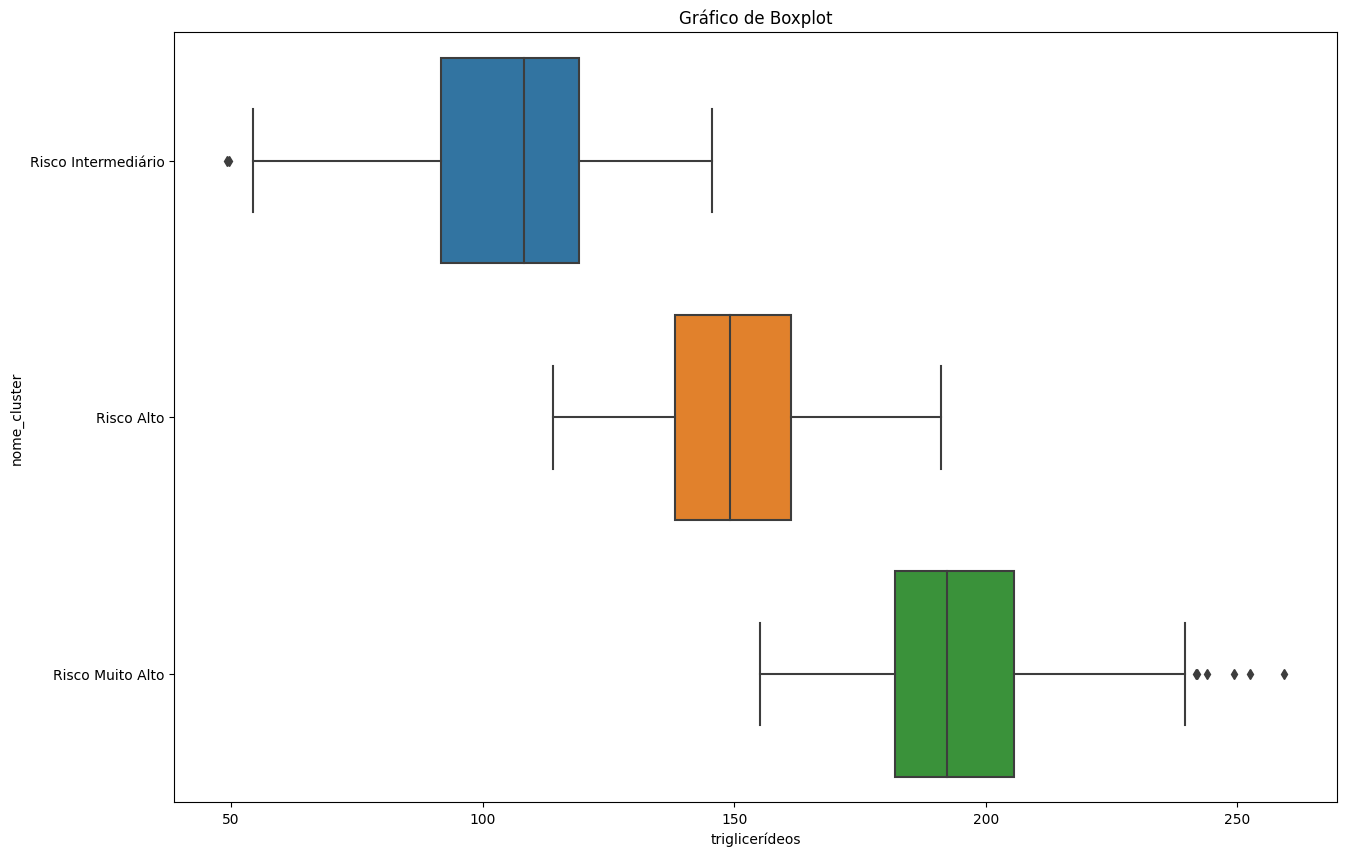

In [ ]:
#Boxplot triglicerídeos e cluster
plt.figure(figsize=(15,10))
plt.title('Gráfico de Boxplot')
sns.boxplot(x='triglicerídeos', y= 'nome_cluster', data=cluster_clientes.sort_values('triglicerídeos'), orient='h')

In [ ]:
#Grouping Cluster Data by Name
cluster_customers.groupby(['nome_cluster', 'nome'],as_index=True).agg(total=('nome','count'))

In [ ]:
#Grouping Cluster Data by Alcohol Consumption
cluster_customers.groupby(['nome_cluster', 'consumo de álcool'],as_index=True).agg(total=('consumo de álcool','count'))

In [ ]:
#Grouping Cluster Data by Triglycerides and Country Region
cluster_customers.groupby(['triglicerídeos', 'regiao'],as_index=True).agg(total=('triglicerídeos','count'))

In [ ]:
#Grouping Cluster Data by the average weight by gender
cluster_customers.groupby(['gênero', 'nome_cluster'],as_index=True).agg(media=('peso','mean'))

In [ ]:
#Grouping Cluster Data by blood sugar level
cluster_customers.groupby(['nome', 'nível de açúcar'],as_index=True).agg(total=('nível de açúcar', 'count'))

In [ ]:
#Grouping Cluster Data by systolic pressure according to the region of the country
cluster_customers.groupby(['regiao', 'nome_cluster'],as_index=True).agg(media=('pressão sistólica','mean'))

<Axes: title={'center': 'Peso por Risco Alto'}, xlabel='peso', ylabel='nome_cluster'>

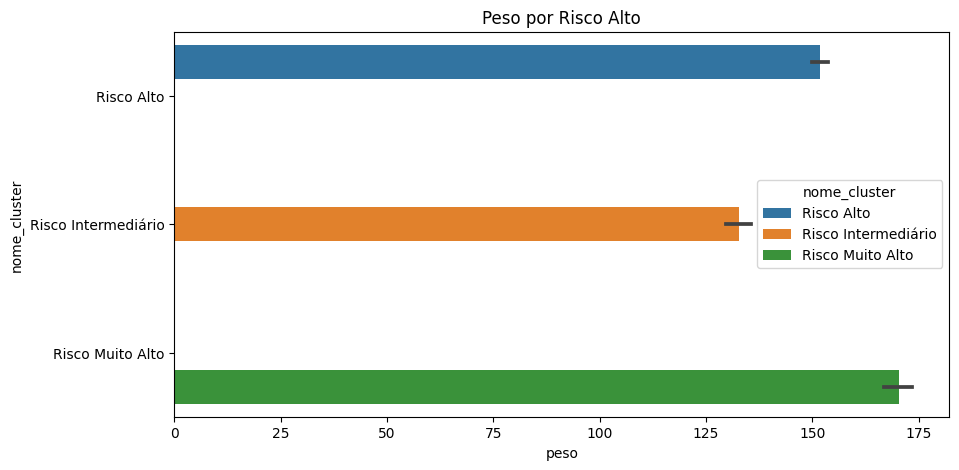

In [ ]:
#Histogram of weight distribution by high risk
plt.figure(figsize=(10,5))
plt.title("Peso por Risco Alto")
sns.barplot(x='peso', y='nome_cluster', data=cluster_clientes, hue='nome_cluster')